# Ensemble : Bagging

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : 랜덤포레스트


In [7]:
# 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       769
           1       0.68      0.63      0.66       731

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500



## 4.시각화와 변수중요도

### (1) 모델의 내부를 살펴봅시다.

In [11]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=365911676),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1486166321),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=791406359),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1799029212),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1741056750)]

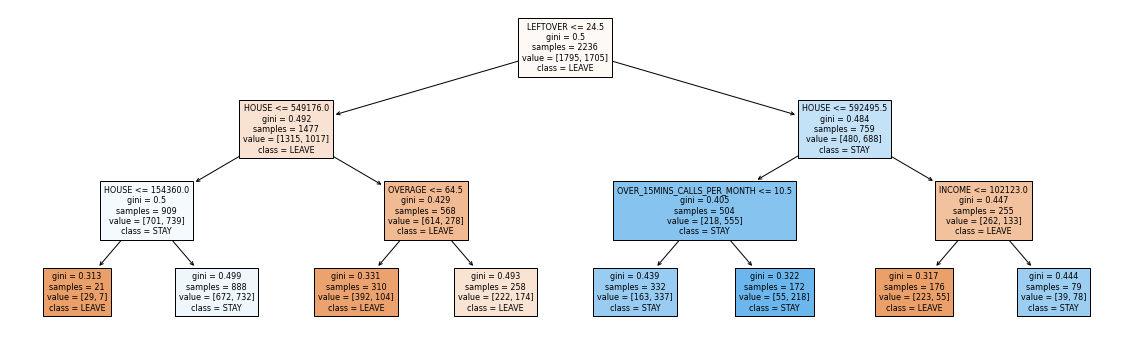

In [12]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(20,6))
plot_tree(model.estimators_[0], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [13]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.09182774 0.05361323 0.15037316 0.36894947 0.0854922
 0.20676647 0.01623327 0.00179546 0.         0.00496975 0.
 0.00676259 0.0019672  0.00419201 0.         0.         0.
 0.00705746 0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [14]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

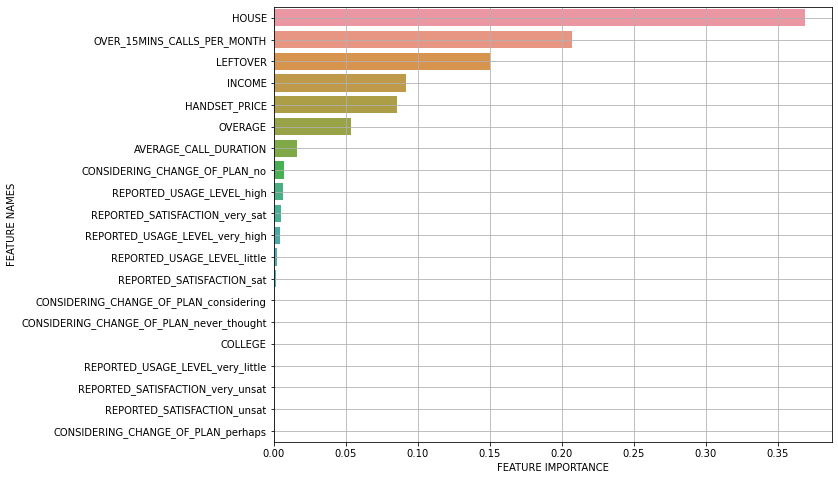

In [15]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습: random forest 튜닝

* grid search를 수행합니다.
    * ① n_estimators 의 갯수를 5 ~ 200까지 5개씩 증가시켜가며 튜닝해 봅시다.
    * ② max_features를 1 ~ feature갯수까지 1씩 증가시켜가며 튜닝해 봅시다.
    * ③ n_estimators, max_features를 동시에 튜닝.

* 모델링 후 cv 평가 결과를 차트로 그려봅시다. 
* 튜닝된 모델로 부터 변수중요도를 뽑아 봅시다.


### (1) n_estimators 튜닝

In [16]:
models = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': range(5, 201, 5)}, cv=10)

In [17]:
models.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(5, 201, 5)})

In [18]:
pred = models.predict(x_val)

In [19]:
models.best_score_

0.6905714285714286

In [20]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       769
           1       0.69      0.72      0.70       731

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.71      0.70      0.70      1500



- 튜닝 결과를 그래프로 그리기

In [21]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(models.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0135,0.000922,0.0019,0.000300,5,{'n_estimators': 5},0.625714,0.631429,0.645714,0.705714,0.648571,0.637143,0.662857,0.654286,0.662857,0.625714,0.650000,0.022723,39
1,0.0249,0.000831,0.0018,0.000400,10,{'n_estimators': 10},0.631429,0.588571,0.685714,0.671429,0.671429,0.634286,0.628571,0.645714,0.688571,0.648571,0.649429,0.029195,40
2,0.0371,0.001446,0.0020,0.000447,15,{'n_estimators': 15},0.640000,0.640000,0.705714,0.694286,0.685714,0.651429,0.628571,0.651429,0.702857,0.677143,0.667714,0.027197,37
3,0.0497,0.001005,0.0024,0.000490,20,{'n_estimators': 20},0.645714,0.634286,0.711429,0.708571,0.648571,0.642857,0.660000,0.700000,0.674286,0.651429,0.667714,0.027525,38
4,0.0616,0.003105,0.0027,0.000458,25,{'n_estimators': 25},0.680000,0.614286,0.685714,0.711429,0.700000,0.662857,0.665714,0.708571,0.708571,0.700000,0.683714,0.028516,16


In [22]:
temp = result.loc[:, ['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,5,0.650000
1,10,0.649429
2,15,0.667714
3,20,0.667714
4,25,0.683714


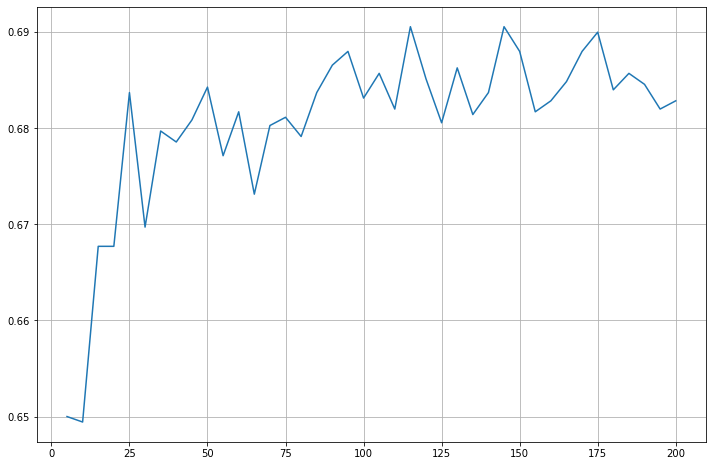

In [23]:
plt.figure(figsize=(12, 8))
plt.plot('param_n_estimators', 'mean_test_score', data=temp)
plt.grid()
plt.show()

### (2) max_features 튜닝

In [24]:
x_train.shape

(3500, 20)

In [25]:
# 1~20
params = {'max_features': range(1,21)}

In [28]:
#  Default Model 

m = RandomForestClassifier()

# GridSearchCV state
m_gs = GridSearchCV(m, params, cv=5, verbose=3)

In [29]:
# Tuning
m_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....................max_features=1;, score=0.644 total time=   0.1s
[CV 2/5] END ....................max_features=1;, score=0.681 total time=   0.1s
[CV 3/5] END ....................max_features=1;, score=0.657 total time=   0.0s
[CV 4/5] END ....................max_features=1;, score=0.670 total time=   0.1s
[CV 5/5] END ....................max_features=1;, score=0.681 total time=   0.0s
[CV 1/5] END ....................max_features=2;, score=0.656 total time=   0.1s
[CV 2/5] END ....................max_features=2;, score=0.694 total time=   0.1s
[CV 3/5] END ....................max_features=2;, score=0.669 total time=   0.1s
[CV 4/5] END ....................max_features=2;, score=0.681 total time=   0.1s
[CV 5/5] END ....................max_features=2;, score=0.681 total time=   0.1s
[CV 1/5] END ....................max_features=3;, score=0.669 total time=   0.1s
[CV 2/5] END ....................max_features=3

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21)}, verbose=3)

In [30]:
m_gs.best_params_

{'max_features': 4}

In [31]:
m_gs.best_score_

0.6882857142857142

In [32]:
m_gs.cv_results_

{'mean_fit_time': array([0.13801551, 0.15855293, 0.18534465, 0.21499724, 0.24177852,
        0.27181487, 0.2955997 , 0.32080646, 0.35722995, 0.3796741 ,
        0.40431294, 0.43259983, 0.45757809, 0.49731827, 0.51703243,
        0.54101782, 0.57463708, 0.59742217, 0.62095928, 0.65922294]),
 'std_fit_time': array([0.00219854, 0.00239119, 0.00250004, 0.00213196, 0.00229529,
        0.00477285, 0.00372023, 0.0040751 , 0.00514626, 0.00634209,
        0.00396277, 0.00372024, 0.00290016, 0.00958973, 0.00437292,
        0.00470666, 0.00474065, 0.00739394, 0.00533304, 0.01215904]),
 'mean_score_time': array([0.01179991, 0.01120014, 0.01100025, 0.01180005, 0.0104003 ,
        0.01020017, 0.01060009, 0.01039996, 0.01100011, 0.01000018,
        0.0104002 , 0.00999994, 0.01040001, 0.01100001, 0.01080031,
        0.01022267, 0.01020021, 0.01000023, 0.00980039, 0.00999999]),
 'std_score_time': array([7.48162555e-04, 1.16602408e-03, 6.32409721e-04, 7.48455822e-04,
        4.89784605e-04, 3.99994975e-

In [33]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(m_gs.cv_results_)
temp = result.loc[:, ['param_max_features','mean_test_score']]
temp.head()

,param_max_features,mean_test_score
0,1,0.666857
1,2,0.676286
2,3,0.677714
3,4,0.688286
4,5,0.683143


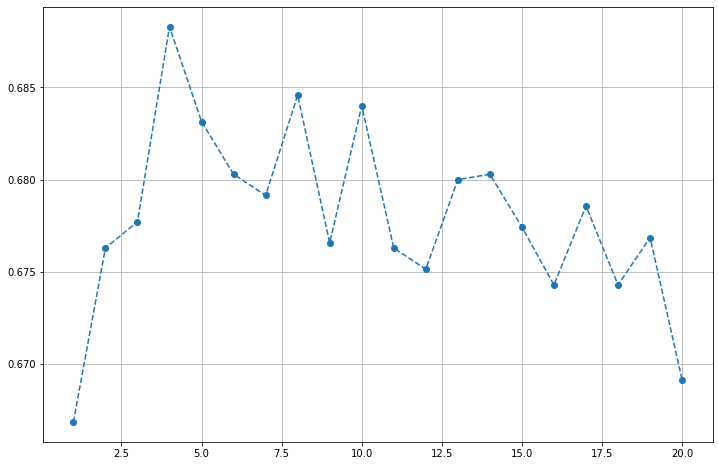

In [44]:
plt.figure(figsize=(12, 8))
plt.plot('param_max_features', 'mean_test_score', marker='o', linestyle='--', data=temp )
plt.grid()
plt.show()

* 변수 중요도

### (3) n_estimators와 max_features를 한꺼번에 튜닝

In [59]:
params ={'n_estimators': [20, 30, 50, 100, 150, 200], 'max_features': range(1,21)}

In [60]:
#  Default Model 

m = RandomForestClassifier()

# GridSearchCV state
m_gs = GridSearchCV(m, params, cv=5, verbose=3)

In [61]:
# Tuning
m_gs.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ...max_features=1, n_estimators=20;, score=0.617 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=20;, score=0.656 total time=   0.0s
[CV 3/5] END ...max_features=1, n_estimators=20;, score=0.621 total time=   0.0s
[CV 4/5] END ...max_features=1, n_estimators=20;, score=0.627 total time=   0.0s
[CV 5/5] END ...max_features=1, n_estimators=20;, score=0.651 total time=   0.0s
[CV 1/5] END ...max_features=1, n_estimators=30;, score=0.621 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=30;, score=0.651 total time=   0.0s
[CV 3/5] END ...max_features=1, n_estimators=30;, score=0.641 total time=   0.0s
[CV 4/5] END ...max_features=1, n_estimators=30;, score=0.631 total time=   0.0s
[CV 5/5] END ...max_features=1, n_estimators=30;, score=0.633 total time=   0.0s
[CV 1/5] END ...max_features=1, n_estimators=50;, score=0.633 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=5

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': [20, 30, 50, 100, 150, 200]},
             verbose=3)

In [64]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(m_gs.cv_results_)
temp = result.loc[:, ['param_max_features', 'param_n_estimators','mean_test_score']]
temp.head()

,param_max_features,param_n_estimators,mean_test_score
0,1,20,0.634571
1,1,30,0.635714
2,1,50,0.655143
3,1,100,0.666571
4,1,150,0.664000


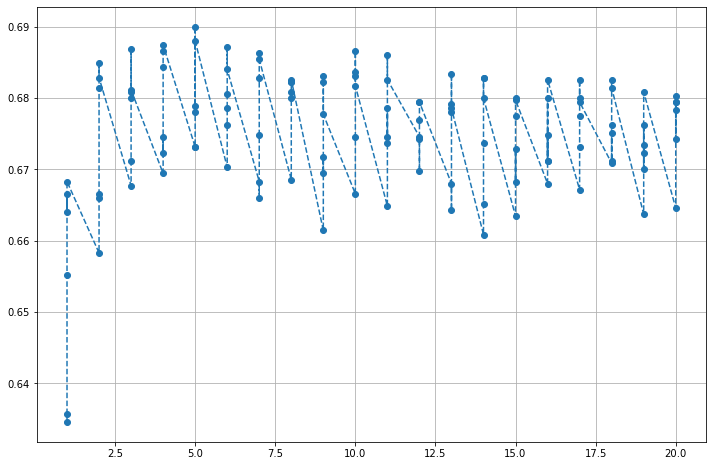

In [65]:
plt.figure(figsize=(12, 8))
plt.plot('param_max_features', 'mean_test_score', marker='o', linestyle='--', data=temp )
plt.grid()
plt.show()

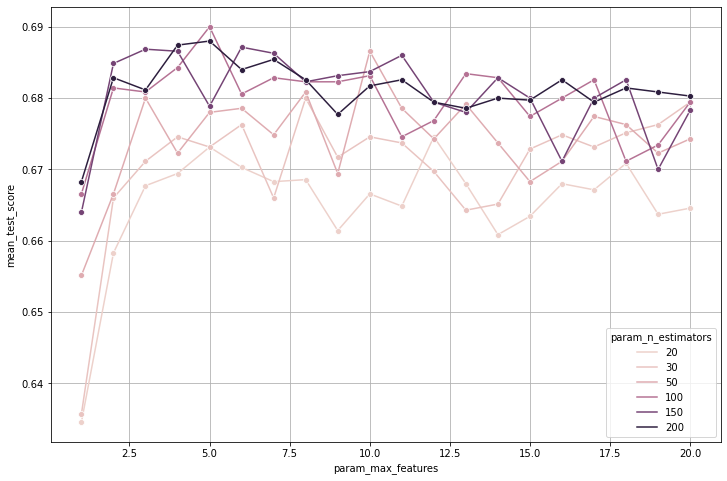

In [68]:
plt.figure(figsize=(12, 8))
sns.lineplot('param_max_features', 'mean_test_score', data=temp, hue='param_n_estimators', marker='o')
plt.grid()
plt.show()

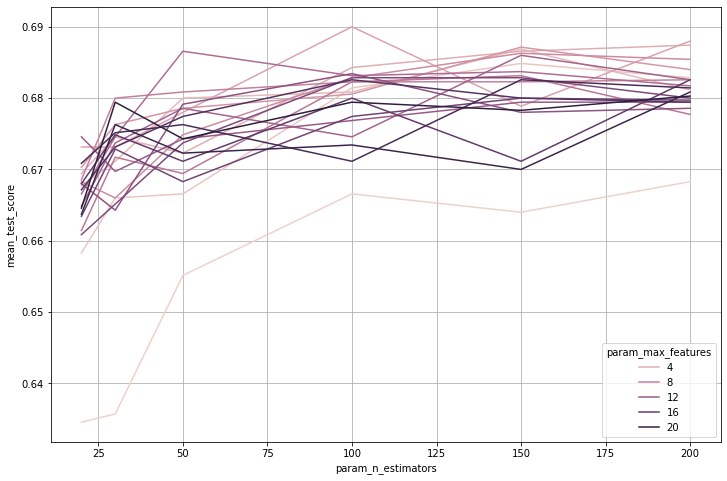

In [67]:
plt.figure(figsize=(12, 8))
sns.lineplot('param_n_estimators', 'mean_test_score', data=temp, hue='param_max_features')
plt.grid()
plt.show()